<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/test/Statistics%20related%20python/Week2%20/%E5%AF%BC%E5%85%A5%E6%96%B0%E6%95%B0%E6%8D%AE%E9%9B%86%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMA3.xlsx to IMA3.xlsx


In [25]:
crane14_data = data[data['Crane'] == 'Crane14']['Interval']
interval_stats = crane14_data.describe()
print(interval_stats)
interval_max = crane14_data.max()
interval_min = crane14_data.min()
print(f"Max: {interval_max}, Min: {interval_min}")

count     11.000000
mean     124.909091
std       95.671787
min       32.000000
25%       50.500000
50%      112.000000
75%      147.000000
max      359.000000
Name: Interval, dtype: float64
Max: 359, Min: 32


In [3]:
import pandas as pd
data = pd.read_excel('IMA3.xlsx', index_col=0)
print(data)

      Crane  Interval
0   Crane14       140
1   Crane14       140
2   Crane14       112
3   Crane14        90
4   Crane14        32
5   Crane14       154
6   Crane14       359
7   Crane14       207
8   Crane14        61
9   Crane14        39
10  Crane14        40
11  Crane15        69
12  Crane15        14
13  Crane15        38
14  Crane15        94
15  Crane15        46
16  Crane15        36
17  Crane15        84
18  Crane15       106
19  Crane15       269
20  Crane15       445
21  Crane15        42
22  Crane15       108
23  Crane15       244
24  Crane15        92
25  Crane15       148
26  Crane15       303
27  Crane15        24
28  Crane15       328
29  Crane15       207
30  Crane15       260
31  Crane15       132
32  Crane15        56
33  Crane16        39
34  Crane16       135
35  Crane16        57
36  Crane16        31
37  Crane16       190
38  Crane16        90
39  Crane16       293
40  Crane16       151
41  Crane16        26
42  Crane16        77
43  Crane16        82
44  Crane1

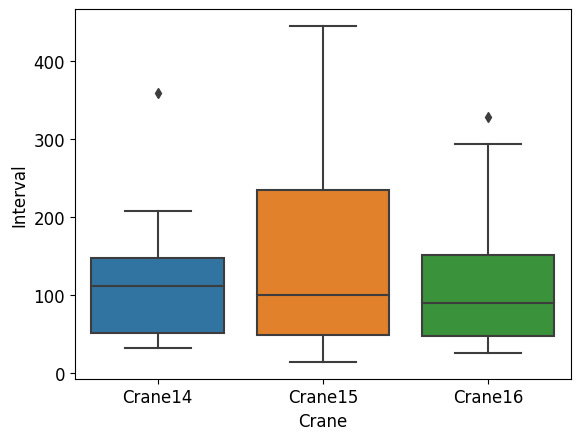

In [6]:
import matplotlib.pyplot  as plt
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
import pandas as pd
import seaborn as sns
data= pd.read_excel('IMA3.xlsx',index_col=0)
sns.boxplot(x = 'Crane', y = 'Interval',data=data)
plt.show()

In [7]:
# Bartlett 方差齐性检验
import pandas as pd
from scipy.stats import bartlett

# 将数据按照 Crane 分类变量进行分组
gb = data.groupby('Crane')

# 将每个分组中的 Interval 数据提取出来作为输入数据
data_for_analysis = [group['Interval'] for name, group in gb]

# 使用 Bartlett 方差齐性检验来检查数据
stat, p = bartlett(*data_for_analysis)

# 打印 Bartlett 方差齐性检验结果
print('Bartlett test statistic = {:.4f}, p-value = {:.4f}'.format(stat, p))

Bartlett test statistic = 1.6060, p-value = 0.4480


In [9]:
from scipy.stats import levene
gb = data.groupby('Crane')
groups=[]
for a,group in gb:
    groups.append(group['Interval'])
l=levene(*groups)
print(l)

LeveneResult(statistic=0.6239622756851123, pvalue=0.5401964275983935)


count     50.000000
mean     129.920000
std      102.482421
min       14.000000
25%       46.250000
50%       93.000000
75%      155.500000
max      445.000000
Name: Interval, dtype: float64
Box Plot Values:
Q1: 46.25, Q3: 155.5, IQR: 109.25
Lower Bound for Outliers: -117.625
Upper Bound for Outliers: 319.375

Rounded Number of classes: 6
class Range: 71.83333333333333


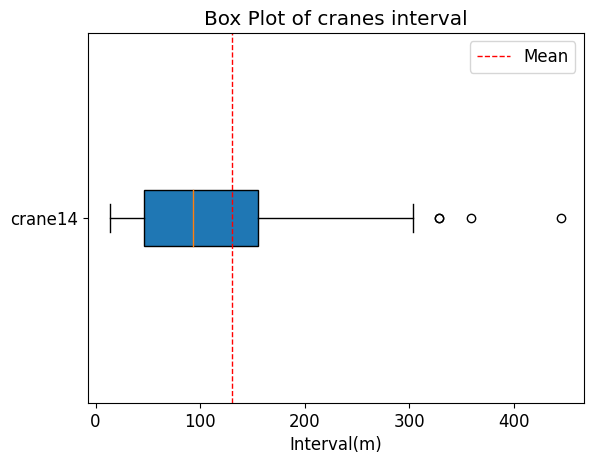

Classes:
     Interval  Frequency
0   85.833333         21
1  157.666667         17
2  229.500000          3
3  301.333333          4
4  373.166667          4
5  445.000000          1 



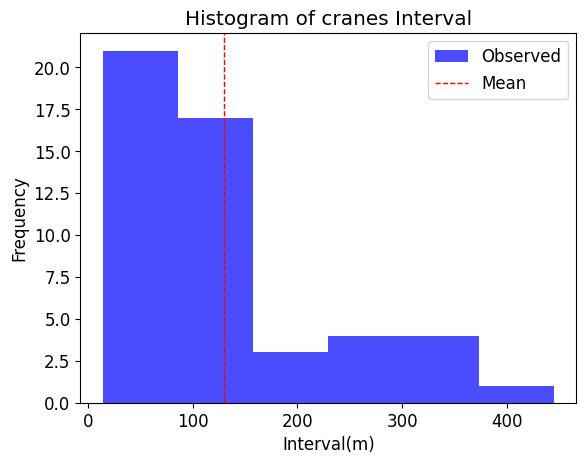

Chi-Square Table:
           χ^2
0     1.120910
1     0.817291
2     6.174963
3     0.622793
4     2.254548
5     0.966799
Sum  11.957304
Number of classes (bins) using Sturges' formula: 6
Chi-square Statistic: 11.957304286157845, p-value: 0.007575221363088894


,CDF,Bin Frequency,Expected Value
0,0.33353,0.333530,16.676480
1,0.606707,0.273177,13.658853
2,0.834395,0.227688,11.384409
3,0.952798,0.118403,5.920166
4,0.991191,0.038393,1.919636
5,0.998946,0.007755,0.387738
6,Sum =,0.998946,50.000000


In [19]:
# Chi-Square nominal test for 三组总体
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# 描述性统计
desc_stats = data['Interval'].describe()
print(desc_stats)

# Calculating the boundaries for outliers  用于计算异常值的边界
# IQR = Q3 - Q1 计算了四分位数范围（IQR），即Q3与Q1之间的差值
# lower_bound = Q1 - (1.5 * IQR): 这一行代码计算了异常值的下边界。下边界通过将1.5倍的IQR从Q1中减去得到。
Q1 = data['Interval'].quantile(0.25)
Q3 = data['Interval'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(data['Interval'])
std_dev = np.std(data['Interval'], ddof=1)

# Calculate Sturges' number of bins
n = len(data['Interval'])   # 计算数据集的样本数量
k = int(1 + 3.322 * np.log10(n)) # 计算No. of classes
classrange=np.ptp(data['Interval'])/k  # np.ptp()在这里的作用是计算峰值之差，即range
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(data['Interval'], bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev) #stats.norm.cdf是SciPy库中用于计算正态分布CDF的函数

# Box plot
plt.boxplot(data['Interval'], vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of cranes interval')
plt.xlabel('Interval(m)')
plt.yticks([1], ['crane14'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Interval': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin，hist表示直方图中每个区间的频率（Frequency）
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Interval=hist_df.Interval+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(data['Interval'], bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of cranes Interval')
plt.xlabel('Interval(m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df =  pd.concat([table_df, sum_row], ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")

# Display the table
table_df








In [22]:
crane14_data = data[data['Crane'] == 'Crane14']['Interval']
column_types = crane14_data.dtypes
print(column_types)

int64


In [27]:
# 分别对三个样本进行正态检验
## 对Crane14进行nominal test

crane14_data = data[data['Crane'] == 'Crane14']['Interval']

# Calculate mean and standard dviation
mean = np.mean(crane14_data)
std_dev = np.std(crane14_data, ddof=1)

# Calculate Sturges' number of bins
n = len(crane14_data)   # 计算数据集的样本数量
k = int(1 + 3.322 * np.log10(n)) # 计算No. of classes
classrange=np.ptp(crane14_data)/k  # np.ptp()在这里的作用是计算峰值之差，即range
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(crane14_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev) #stats.norm.cdf是SciPy库中用于计算正态分布CDF的函数

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Interval': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin，hist表示直方图中每个区间的频率（Frequency）
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Interval=hist_df.Interval+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]
print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df =  pd.concat([table_df, sum_row], ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

Rounded Number of classes: 4
class Range: 81.75
Classes:
   Interval  Frequency
0    113.75          6
1    195.50          3
2    277.25          1
3    359.00          1 

Chi-Square Table:
          χ^2
0    0.204740
1    0.065527
2    0.441663
3    0.409322
Sum  1.121253
Number of classes (bins) using Sturges' formula: 4
Chi-square Statistic: 1.1212525562486588, p-value: 0.2915171939863068


,CDF,Bin Frequency,Expected Value
0,0.453573,0.453573,4.989302
1,0.769696,0.316123,3.477349
2,0.944345,0.174649,1.921139
3,0.992794,0.048449,0.532941
4,Sum =,0.992794,11.000000


In [10]:
# 另一种ANOVA检验的方法
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
data= pd.read_excel('IMA3.xlsx',index_col=0)

# 先来看下从Crane因素开始分析
model_Crane=ols('Interval~C(Crane)',data).fit()# ols（）创建一线性回归分析模型
anova_table=anova_lm(model_Crane)# anova_lm（）函数创建模型生成方差分析表
print(anova_table)
# 进行事后比较分析
print(pairwise_tukeyhsd(data['Interval'], data['Crane']))

            df         sum_sq       mean_sq        F    PR(>F)
C(Crane)   2.0    7170.286952   3585.143476  0.33205  0.719121
Residual  47.0  507459.393048  10797.008363      NaN       NaN
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper   reject
---------------------------------------------------------
Crane14 Crane15  18.0455 0.8855  -74.8166 110.9075  False
Crane14 Crane16   -8.615  0.975 -105.9227  88.6927  False
Crane15 Crane16 -26.6604 0.7082 -107.8659  54.5451  False
---------------------------------------------------------


In [ ]:
# 另一种ANOVA检测方法
